In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
student_data = pd.read_csv('tst_student.csv', index_col=0)
question_data = pd.read_csv('tst_questions.csv', index_col=0)

In [3]:
student_data.head()

,1,2,3,4,5,6,7,8,9,10,Target
Roll No,,,,,,,,,,,
1,2.5,1.0,5.0,4.0,2.0,5.0,2.5,3.0,4.0,3.5,4
2,4.0,1.5,7.0,5.5,3.5,4.0,3.5,4.5,5.5,4.5,4
3,3.5,1.5,5.5,6.5,5.0,5.5,4.5,3.0,5.5,5.5,1
4,3.0,2.0,6.0,4.5,4.0,5.5,4.5,5.0,6.5,4.0,6
5,3.5,2.0,6.5,7.0,4.5,5.5,5.0,3.5,5.5,4.5,3


In [4]:
question_data

,Max Marks,Bloom Level
Q#,,
1,4,4
2,2,2
3,7,4
4,7,2
5,5,1
6,6,1
7,5,3
8,5,2
9,7,6


In [5]:
train, test = train_test_split(student_data, test_size=0.3)
train_x, train_y = train[train.columns[:10]], train['Target']
test_x, test_y = test[test.columns[:10]], test['Target']

In [6]:
nb_model = MultinomialNB()
svm_model = LinearSVC(multi_class='ovr')

In [7]:
nb_model.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
svm_model.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
first_n = 20  # Number of data points to be used for plotting

In [10]:
nb_prediction = nb_model.predict(test_x)
svm_prediction = svm_model.predict(test_x)
pd.DataFrame(data={'Expected': test_y.values, 'Naive Bayes': nb_prediction,
                   'SVM': svm_prediction}, index=test_x.index).head(first_n)

,Expected,Naive Bayes,SVM
Roll No,,,
2965,6,6,6
5099,2,3,2
1213,3,3,3
1314,4,6,4
6443,5,5,5
4276,6,3,6
4446,4,3,4
9907,1,3,1
8514,5,3,5


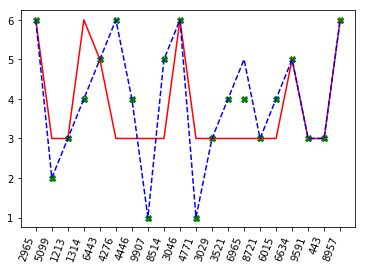

In [11]:
plt.plot(test_y.values[:first_n], 'gX')
plt.plot(nb_prediction[:first_n], 'r')
plt.plot(svm_prediction[:first_n], 'b--')
plt.xticks(range(first_n), test_x.index[:first_n],
           rotation=70, horizontalalignment='right')
plt.show()

In [12]:
accuracy_score(test_y.values, nb_prediction)

0.46000000000000002

In [13]:
accuracy_score(test_y.values, svm_prediction)

0.88866666666666672